In [2095]:
%config Completer.use_jedi = False

In [2096]:
import pandas as pd
import numpy as np
import matplotlib as mpl
# import seaborn as sns
# from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

In [2097]:
# Caminhos dos diretórios raiz
# general_path = 'C:/Users/cnalm/OneDrive/Hidroweb'
# general_path = 'D:/Dados_Nuvem/OneDrive/Hidroweb'
general_path = r'C:\Users\linde\OneDrive\Hidroweb'
cemaden_path = r'C:\Users\linde\OneDrive\CEMADEN\1 - Organized data'

In [2098]:
hq_list = ['High Quality']
lq_list = ['Low Quality']

In [2099]:
def absolute_quality_label(row):
    if row['quality_label'] in hq_list:
        return 'HQ'
    elif row['quality_label'] in lq_list:
        return 'LQ'
    else:
        return 'Unknown'

In [2100]:
df_quality = pd.read_csv(r".\CEMADEN\Estacoes_Alta_Qualidade_da_Analise_Visual.csv", sep=';')
df_quality

,AC_ 2014,AC_ 2015,AC_ 2016,AC_ 2017,AC_ 2018,AC_ 2019,AL_ 2014,AL_ 2015,AL_ 2016,AL_ 2017,...,MS_ 2022,GO_ 2022,DF_ 2022,ES_ 2022,MG_ 2022,RJ_ 2022,SP_ 2022,RS_ 2022,SC_ 2022,PR_ 2022
0,NaN,NaN,NaN,NaN,NaN,120010401A,NaN,270430205A,270060701A,270130801A,...,500110201A,520025801A,530010802A,320010207A,310110201A,330010001G,350050101A,430040601A,420050701A,410040002A
1,NaN,NaN,NaN,NaN,NaN,120070801A,NaN,270430207A,270130801A,270135701A,...,500190401A,520025803A,530010804A,320030001A,310170601A,330010007A,350050102A,430060402A,420130704A,410040003A
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270430209A,270135701A,270430203A,...,500270401A,520030801A,530010805A,320040902A,310230801A,330010014A,350190501A,430060403A,420140601A,410040004A
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270430210A,270430202A,270430207A,...,500270402A,520110801A,NaN,320040903A,310470001A,330010015A,350190502A,430120601A,420150501A,410040006A
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270430211A,270430209A,270430210A,...,500270403A,520140501A,NaN,320050801A,310560814A,330010017A,350250701A,430130501A,420180202A,410040008A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2101]:
# Melt the DataFrame to pivot the column titles
df_quality.reset_index(drop=False, inplace=True)
melted_df = pd.DataFrame(pd.melt(df_quality, id_vars=['index'], var_name='uf_year', value_name='gauge_code'))
melted_df.drop(columns=['index'], inplace=True)
melted_df.dropna(inplace=True)
melted_df.reset_index(drop=True, inplace=True)
# Display the result
melted_df

,uf_year,gauge_code
0,AC_ 2019,120010401A
1,AC_ 2019,120070801A
2,AL_ 2015,270430205A
3,AL_ 2015,270430207A
4,AL_ 2015,270430209A
...,...,...
9977,PR_ 2022,412570401A
9978,PR_ 2022,412570402A
9979,PR_ 2022,412790801A
9980,PR_ 2022,412820301A


In [2102]:
melted_df['year'] = (melted_df['uf_year'].str[-4:]).astype(int)
melted_df['visual_quality'] = 'HQ'
melted_df = melted_df[['gauge_code','year',	'visual_quality']]
melted_df

,gauge_code,year,visual_quality
0,120010401A,2019,HQ
1,120070801A,2019,HQ
2,270430205A,2015,HQ
3,270430207A,2015,HQ
4,270430209A,2015,HQ
...,...,...,...
9977,412570401A,2022,HQ
9978,412570402A,2022,HQ
9979,412790801A,2022,HQ
9980,412820301A,2022,HQ


In [2103]:
# df_gauges = pd.read_excel(r".\CEMADEN\Table_info_BR_2022.xlsx", sheet_name='in')
# df_gauges = df_gauges[['gauge_code', 'long', 'lat']]
# df_gauges

In [2104]:
# df_cemaden_hq_info = pd.merge(melted_df, df_gauges, how = 'left', on = ['gauge_code'])
# df_cemaden_hq_info

In [2105]:
# df_cemaden_hq_info.to_hdf(general_path + '/Quality/CEMADEN_DAILY_VISUAL_INSPECTION_QUALITY_BY_YEAR.h5', 'table_data', mode = 'w', append = False, complevel = 9, encoding="cp860")
# df_cemaden_hq_info

In [2106]:
df_cemaden_q_index = pd.read_hdf(general_path + '/Quality/CEMADEN_DAILY_Q_QUALITY_INDEX_BY_YEAR_V2.h5', 'table_data')
df_cemaden_q_index['year'] = df_cemaden_q_index['year'].astype(int)
df_cemaden_q_index['absolute_quality'] = df_cemaden_q_index.apply(absolute_quality_label, axis=1)
df_cemaden_q_index = df_cemaden_q_index[df_cemaden_q_index['year'] <= 2020]
df_cemaden_q_index

,gauge_code,year,p_availability,q1_gaps,q2_weekday,q3_outliers,q4_repetition,quality_index,quality_label,absolute_quality
0,120010401A,2018,38.356164,100.000000,91.196100,99.178082,100,85.746069,Low Quality,LQ
1,120010401A,2019,97.260274,92.328767,86.578585,97.534247,100,94.740375,High Quality,HQ
2,120010401A,2020,100.000000,100.000000,85.655617,99.180328,100,96.967189,High Quality,HQ
3,120032801A,2018,37.808219,98.356164,80.787545,98.904110,100,83.171208,Low Quality,LQ
4,120032801A,2019,72.054795,41.643836,86.616257,97.260274,100,79.515032,Low Quality,LQ
...,...,...,...,...,...,...,...,...,...,...
22768,CEMADEN_12,2019,24.657534,100.000000,90.159144,98.904110,100,82.744158,Low Quality,LQ
22769,CEMADEN_12,2020,8.469945,100.000000,88.614499,99.453552,100,79.307599,Low Quality,LQ
22770,CEMADEN_13,2019,6.301370,94.794521,20.627461,99.726027,100,64.289876,Low Quality,LQ
22771,CEMADEN_14,2018,25.205479,100.000000,78.723842,98.356164,100,80.457097,Low Quality,LQ


In [2107]:
df_compare = pd.merge(df_cemaden_q_index, melted_df, how = 'left', on = ['gauge_code', 'year'])
df_compare['visual_quality'].fillna('LQ', inplace=True)
df_compare.sort_values('year', ascending = True, inplace=True, ignore_index=True)
df_compare

C:\Users\linde\AppData\Local\Temp\ipykernel_19676\2384638847.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_compare['visual_quality'].fillna('LQ', inplace=True)


,gauge_code,year,p_availability,q1_gaps,q2_weekday,q3_outliers,q4_repetition,quality_index,quality_label,absolute_quality,visual_quality
0,330050601A,2014,50.410959,100.000000,80.607064,99.178082,100,86.039221,Low Quality,LQ,LQ
1,260820601A,2014,36.712329,100.000000,86.504657,98.356164,100,84.314630,Low Quality,LQ,LQ
2,353110004A,2014,91.506849,100.000000,84.736050,98.356164,100,94.919813,High Quality,HQ,HQ
3,293330705A,2014,41.917808,100.000000,85.149347,99.452055,100,85.303842,Low Quality,LQ,LQ
4,420830201A,2014,91.506849,100.000000,85.410504,98.082192,100,94.999909,High Quality,HQ,HQ
...,...,...,...,...,...,...,...,...,...,...,...
22768,421010001A,2020,100.000000,100.000000,83.834192,98.907104,100,96.548259,High Quality,HQ,LQ
22769,352100201A,2020,30.327869,0.000000,71.536248,99.726776,100,60.318179,Low Quality,LQ,LQ
22770,520140508A,2020,0.273224,100.000000,0.000000,100.000000,100,60.054645,Low Quality,LQ,LQ
22771,520140507A,2020,34.153005,0.000000,84.092862,99.180328,100,63.485239,Low Quality,LQ,LQ


In [2108]:
df_compare.to_excel('df_qualidade_V2.xlsx')

## HIDE

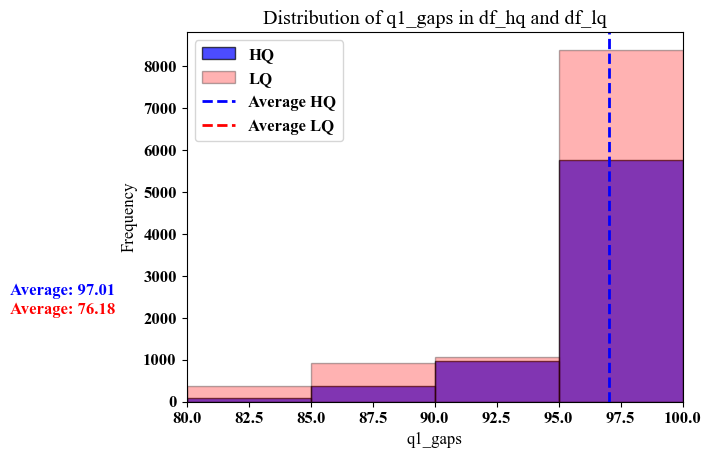

In [2109]:
import numpy as np
import matplotlib.pyplot as plt

variable = 'q1_gaps'
df_hq = df_compare[df_compare['visual_quality'] == 'HQ']
df_lq = df_compare[df_compare['visual_quality'] == 'LQ']
p_availability_hq = df_hq[variable].mean()
p_availability_lq = df_lq[variable].mean()

# Determine the bin width
bin_width = 5  # Adjust as needed

# Calculate bin edges
data_min = min(df_hq[variable].min(), df_lq[variable].min())
data_max = max(df_hq[variable].max(), df_lq[variable].max())
bins = np.arange(data_min, data_max + bin_width, bin_width)

# Plot histograms for HQ and LQ with bins of the same width
plt.hist(df_hq[variable], bins=bins, alpha=0.7, label='HQ', color='blue', edgecolor='black')
plt.hist(df_lq[variable], bins=bins, alpha=0.3, label='LQ', color='red', edgecolor='black')

# Add average lines
plt.axvline(p_availability_hq, color='blue', linestyle='dashed', linewidth=2, label='Average HQ')
plt.axvline(p_availability_lq, color='red', linestyle='dashed', linewidth=2, label='Average LQ')

# Add text annotations
dist_x = 75
plt.text(dist_x, plt.gca().get_ylim()[1] * 0.32, f'Average: {p_availability_hq:.2f}', ha='center', va='top', fontsize=12, color='blue')
plt.text(dist_x, plt.gca().get_ylim()[1] * 0.27, f'Average: {p_availability_lq:.2f}', ha='center', va='top', fontsize=12, color='red')
plt.xlim(80, 100)
# plt.ylim(0, data_max)

plt.xlabel(variable)
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of '+variable+' in df_hq and df_lq')
plt.show()

In [2110]:
counts = df_hq.groupby(df_hq['q4_repetition']).size()
counts

q4_repetition
0       128
100    7217
dtype: int64

## RESULTS

In [2111]:
# Example confusion matrix data (replace this with your actual data)
actual = np.array(df_compare['visual_quality'].values.tolist())
predicted = np.array(df_compare['absolute_quality'].values.tolist())

# Calculate confusion matrix
confusion_matrix = metrics.confusion_matrix(actual, predicted)

# Normalize to percentages
row_sums = confusion_matrix.sum(axis=1)
row_sums[row_sums == 0] = 1  # Avoid division by zero
confusion_matrix_percentage = confusion_matrix.astype('float') / row_sums[:, np.newaxis] * 100
confusion_matrix_percentage

array([[95.0987066 ,  4.9012934 ],
       [21.34430905, 78.65569095]])

In [2112]:
confusion_matrix

array([[ 6985,   360],
       [ 3293, 12135]], dtype=int64)

In [2113]:
TP, FN = confusion_matrix[0, 0], confusion_matrix[0, 1]
FP, TN = confusion_matrix[1, 0], confusion_matrix[1, 1]

precision = TP / (TP + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)
recall = TP / (TP + FN)

print("Precision:", precision)
print("Accuracy:", accuracy)
print("Recall:", recall)

Precision: 0.6796069274177856
Accuracy: 0.8395907434242305
Recall: 0.9509870660313138


In [2114]:
mc00 = ("("+str(round(confusion_matrix_percentage[0][0], 1))+"%)")
mc01 = ("("+str(round(confusion_matrix_percentage[0][1], 1))+"%)")
mc10 = ("("+str(round(confusion_matrix_percentage[1][0], 1))+"%)")
mc11 = ("("+str(round(confusion_matrix_percentage[1][1], 1))+"%)")
print(mc00, mc01, mc10, mc11)

(95.1%) (4.9%) (21.3%) (78.7%)


C:\Users\linde\AppData\Local\Temp\ipykernel_19676\125511905.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


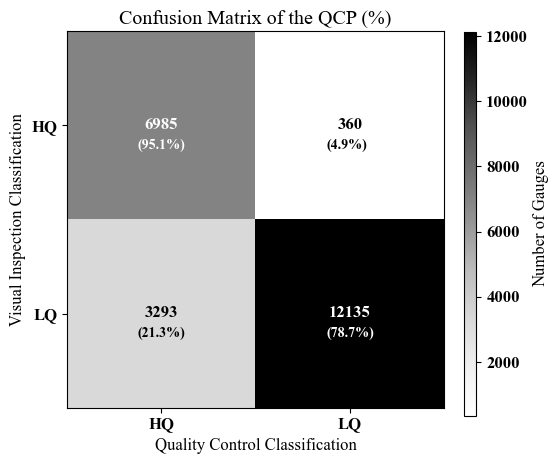

In [2115]:
font = {
    'family' : 'Times New Roman',
    'weight' : 'bold',
    'size'   : '12'}
plt.rc('font', **font)
actual = np.array(df_compare['visual_quality'].values.tolist())
predicted = np.array(df_compare['absolute_quality'].values.tolist())
confusion_matrix = metrics.confusion_matrix(actual, predicted)
row_sums = confusion_matrix.sum(axis=1)
row_sums[row_sums == 0] = 1  # Avoid division by zero
class_names = ['HQ','LQ']
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=class_names)
cm_display.plot(cmap='Greys', values_format='.0f', include_values=True, colorbar=False)
plt.text(-0.125, 0.125, mc00, fontsize=10, color = 'white')
plt.text(0.875, 0.125, mc01, fontsize=10)
plt.text(-0.125, 1.125, mc10, fontsize=10)
plt.text(0.875, 1.125, mc11, fontsize=10, color = 'white')
plt.ylabel('Visual Inspection Classification')
plt.xlabel('Quality Control Classification')
plt.title('Confusion Matrix of the QCP (%)', pad = 5)
fig = plt.gcf()
cax = fig.add_axes([0.825, 0.1175, 0.02, 0.8])  # [left, bottom, width, height]
cbar = plt.colorbar(cm_display.im_, cax=cax)
cbar.set_label('Number of Gauges')
plt.tight_layout()
plt.show()
plt.close()

In [2116]:
confusion_matrix_percentage

array([[95.0987066 ,  4.9012934 ],
       [21.34430905, 78.65569095]])

In [2117]:
for year in df_compare['year'].drop_duplicates().values.tolist():
    df_year = df_compare[df_compare['year'] == year]
    count_hq_hq = ((df_year['absolute_quality'] == 'HQ') & (df_year['visual_quality'] == 'HQ')).sum()
    count_hq_lq = ((df_year['absolute_quality'] == 'HQ') & (df_year['visual_quality'] == 'LQ')).sum()
    count_lq_hq = ((df_year['absolute_quality'] == 'LQ') & (df_year['visual_quality'] == 'HQ')).sum()
    count_lq_lq = ((df_year['absolute_quality'] == 'LQ') & (df_year['visual_quality'] == 'LQ')).sum()

    sucess = (count_hq_hq + count_lq_lq) / (len(df_year))
    print(year, sucess, count_hq_hq+count_hq_lq+count_lq_hq+ count_lq_lq - len(df_year))

2014 0.8887130801687764 0
2015 0.8477047146401985 0
2016 0.8382130999094476 0
2017 0.7971305595408895 0
2018 0.8549060542797495 0
2019 0.8239839725243274 0
2020 0.8478322470954944 0


In [2118]:
count_hq_hq = ((df_compare['absolute_quality'] == 'HQ') & (df_compare['visual_quality'] == 'HQ')).sum()
count_hq_lq = ((df_compare['absolute_quality'] == 'HQ') & (df_compare['visual_quality'] == 'LQ')).sum()
count_lq_hq = ((df_compare['absolute_quality'] == 'LQ') & (df_compare['visual_quality'] == 'HQ')).sum()
count_lq_lq = ((df_compare['absolute_quality'] == 'LQ') & (df_compare['visual_quality'] == 'LQ')).sum()

sucess = (count_hq_hq + count_lq_lq) / (count_hq_hq + count_lq_hq + count_hq_lq + count_lq_lq) * 100
sucess

83.95907434242305

In [2119]:
count_by_quality_label = df_compare.groupby('quality_label')['quality_label'].count().reset_index(name='count')

# Print or use the resulting DataFrame
print(count_by_quality_label)

  quality_label  count
0  High Quality  10278
1   Low Quality  12495


In [2120]:
count_by_quality_label['count'].sum()

22773

In [2121]:
count_pivot = df_compare.pivot_table(index='quality_label', columns='visual_quality', aggfunc='size', fill_value=0)
count_pivot.reset_index(drop = False, inplace = True)
count_pivot

visual_quality,quality_label,HQ,LQ
0,High Quality,6985,3293
1,Low Quality,360,12135


In [2122]:
hq_hq = count_pivot[count_pivot['quality_label'].isin(hq_list)]['HQ'].sum()
hq_total = count_pivot['HQ'].sum()
hq_hq_ratio = hq_hq/hq_total*100
print(hq_hq_ratio, "%")

95.09870660313138 %


In [2123]:
hq_hq = count_pivot[count_pivot['quality_label'].isin(lq_list)]['HQ'].sum()
hq_total = count_pivot['HQ'].sum()
hq_hq_ratio = hq_hq/hq_total*100
print(hq_hq_ratio, "%")

4.901293396868618 %


In [2124]:
lq_lq = count_pivot[count_pivot['quality_label'].isin(lq_list)]['LQ'].sum()
lq_total = count_pivot['LQ'].sum()
lq_lq_ratio = lq_lq/lq_total*100
print(lq_lq_ratio, "%")

78.65569095151672 %


In [2125]:
type_error_1 = count_lq_hq / (count_hq_hq + count_lq_hq + count_hq_lq + count_lq_lq) * 100
print(type_error_1, "%")

1.5808193913845345 %


In [2126]:
type_error_2 = count_hq_lq / (count_hq_hq + count_lq_hq + count_hq_lq + count_lq_lq) * 100
print(type_error_2, "%")

14.46010626619242 %
